# Marital Status Classification (Married vs. Unmarried)

In [87]:
# import packages
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(16)

In [88]:
# load data
csv_file = "~/IDC5210_Machine_Learning/Project/Translated_data/demographics_sample10k.csv"
demo_df = pd.read_csv(csv_file)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    10321 non-null  int64  
 1   Unnamed: 0      10321 non-null  int64  
 2   field_1         10321 non-null  int64  
 3   Cust_ID         10321 non-null  int64  
 4   Cust_Segment    10321 non-null  object 
 5   Branch_ID       10321 non-null  int64  
 6   Branch_Y        10321 non-null  float64
 7   Branch_X        10321 non-null  float64
 8   Home_Loc_Y      10321 non-null  float64
 9   Home_Loc_X      10321 non-null  float64
 10  Work_Loc_Y      10321 non-null  float64
 11  Work_Loc_X      10321 non-null  float64
 12  Gender          10321 non-null  object 
 13  Marital_Status  10321 non-null  object 
 14  Education_Lv    10321 non-null  object 
 15  Job_Status      10321 non-null  object 
 16  Income          10080 non-null  float64
 17  Age             10321 non-null 

In [89]:
# drop unnecessary columns
demo_df.drop(["Unnamed: 0", "Unnamed: 0.1", "field_1", "Branch_X", "Branch_Y", "Home_Loc_X", "Home_Loc_Y", "Work_Loc_X", "Work_Loc_Y"], axis = 1, inplace=True)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         10321 non-null  int64  
 1   Cust_Segment    10321 non-null  object 
 2   Branch_ID       10321 non-null  int64  
 3   Gender          10321 non-null  object 
 4   Marital_Status  10321 non-null  object 
 5   Education_Lv    10321 non-null  object 
 6   Job_Status      10321 non-null  object 
 7   Income          10080 non-null  float64
 8   Age             10321 non-null  int64  
 9   Years_w_Bank    10321 non-null  float64
 10  Penalty_201407  10321 non-null  object 
 11  Penalty_201408  10321 non-null  object 
 12  Penalty_201409  10321 non-null  object 
 13  Penalty_201410  10321 non-null  object 
 14  Penalty_201411  10321 non-null  object 
 15  Penalty_201412  10321 non-null  object 
 16  Penalty_201501  10321 non-null  object 
 17  Penalty_201502  10321 non-null 

In [90]:
# count risk types per row
risk_counts = demo_df.iloc[:,10:22].apply(pd.Series.value_counts, axis=1)
risk_counts = risk_counts.fillna(0)

In [91]:
risk_counts

,.,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,0.0,11.0,1.0,0.0,0.0,0.0,0.0
1,0.0,12.0,0.0,0.0,0.0,0.0,0.0
2,1.0,11.0,0.0,0.0,0.0,0.0,0.0
3,0.0,8.0,3.0,0.0,1.0,0.0,0.0
4,0.0,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10316,0.0,12.0,0.0,0.0,0.0,0.0,0.0
10317,0.0,11.0,1.0,0.0,0.0,0.0,0.0
10318,0.0,12.0,0.0,0.0,0.0,0.0,0.0
10319,2.0,9.0,1.0,0.0,0.0,0.0,0.0


In [92]:
demo_df = demo_df.join(risk_counts)
demo_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,...,Work_Region,Home_Region,Branch_Region,.,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,6192286,BİREYSEL,638,E,EVLİ,LİSANSÜSTÜ,EMEKLİ,3000.0,48,15.0,...,MARMARA,MARMARA,MARMARA,0.0,11.0,1.0,0.0,0.0,0.0,0.0
1,24108556,BİREYSEL,170,E,BEKAR,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1000.0,22,3.0,...,MARMARA,MARMARA,MARMARA,0.0,12.0,0.0,0.0,0.0,0.0,0.0
2,10298005,BİREYSEL,212,E,EVLİ,YÜKSEKOKUL,SERBEST MESLEK,4000.0,34,12.0,...,MARMARA,MARMARA,MARMARA,1.0,11.0,0.0,0.0,0.0,0.0,0.0
3,26465153,BİREYSEL,1239,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1200.0,24,1.0,...,MARMARA,MARMARA,MARMARA,0.0,8.0,3.0,0.0,1.0,0.0,0.0
4,25359275,BİREYSEL,1277,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),1500.0,40,2.0,...,MARMARA,MARMARA,MARMARA,0.0,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,22846993,BİREYSEL,153,E,EVLİ,LİSE,ÇALIŞAN EMEKLİ(ÜCRETLİ),4000.0,50,3.0,...,MARMARA,MARMARA,CENTRAL ANATOLIA,0.0,12.0,0.0,0.0,0.0,0.0,0.0
10317,15517038,MİKRO,250,E,EVLİ,ORTAOKUL,SERBEST MESLEK,20000.0,39,8.0,...,MARMARA,MARMARA,MARMARA,0.0,11.0,1.0,0.0,0.0,0.0,0.0
10318,9609664,BİREYSEL,175,E,EVLİ,ORTAOKUL,SERBEST MESLEK,2000.0,28,12.0,...,MARMARA,MARMARA,MARMARA,0.0,12.0,0.0,0.0,0.0,0.0,0.0
10319,17967317,BİREYSEL,596,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),970.0,43,7.0,...,MARMARA,MARMARA,MARMARA,2.0,9.0,1.0,0.0,0.0,0.0,0.0


In [93]:
demo_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
                  'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
                  'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
                  'Penalty_201506'], axis = 1, inplace=True)

In [94]:
demo_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,Home_Region,Branch_Region,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,6192286,BİREYSEL,638,E,EVLİ,LİSANSÜSTÜ,EMEKLİ,3000.0,48,15.0,MARMARA,MARMARA,MARMARA,11.0,1.0,0.0,0.0,0.0,0.0
1,24108556,BİREYSEL,170,E,BEKAR,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1000.0,22,3.0,MARMARA,MARMARA,MARMARA,12.0,0.0,0.0,0.0,0.0,0.0
2,10298005,BİREYSEL,212,E,EVLİ,YÜKSEKOKUL,SERBEST MESLEK,4000.0,34,12.0,MARMARA,MARMARA,MARMARA,11.0,0.0,0.0,0.0,0.0,0.0
3,26465153,BİREYSEL,1239,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1200.0,24,1.0,MARMARA,MARMARA,MARMARA,8.0,3.0,0.0,1.0,0.0,0.0
4,25359275,BİREYSEL,1277,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),1500.0,40,2.0,MARMARA,MARMARA,MARMARA,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,22846993,BİREYSEL,153,E,EVLİ,LİSE,ÇALIŞAN EMEKLİ(ÜCRETLİ),4000.0,50,3.0,MARMARA,MARMARA,CENTRAL ANATOLIA,12.0,0.0,0.0,0.0,0.0,0.0
10317,15517038,MİKRO,250,E,EVLİ,ORTAOKUL,SERBEST MESLEK,20000.0,39,8.0,MARMARA,MARMARA,MARMARA,11.0,1.0,0.0,0.0,0.0,0.0
10318,9609664,BİREYSEL,175,E,EVLİ,ORTAOKUL,SERBEST MESLEK,2000.0,28,12.0,MARMARA,MARMARA,MARMARA,12.0,0.0,0.0,0.0,0.0,0.0
10319,17967317,BİREYSEL,596,E,EVLİ,ORTAOKUL,ÜCRETLİ (ÖZEL),970.0,43,7.0,MARMARA,MARMARA,MARMARA,9.0,1.0,0.0,0.0,0.0,0.0


In [95]:
csv_file2 = "~/IDC5210_Machine_Learning/Project/Translated_data/transactions(SU_ORNEKLEM_KK_HAR_BILGI).csv"
transactions = pd.read_csv(csv_file2, dtype={'Category': 'str'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334625 entries, 0 to 9334624
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Cust_ID         int64  
 2   Trans_Data      object 
 3   Trans_Time      object 
 4   Trans_Amt       float64
 5   Category        object 
 6   Merchant_ID     int64  
 7   Online_Trans    int64  
 8   Trans_Type      object 
 9   Trans_Currency  object 
 10  X               float64
 11  Y               float64
dtypes: float64(3), int64(4), object(5)
memory usage: 854.6+ MB


In [96]:
trans_sub = transactions[['Cust_ID', 'Category', 'Trans_Amt', 'Online_Trans']]
trans_sub

,Cust_ID,Category,Trans_Amt,Online_Trans
0,11861396,RESTORAN,10.57,0
1,13667756,RESTORAN,82.00,0
2,11024865,RESTORAN,15.00,0
3,10922788,RESTORAN,86.00,0
4,10335987,RESTORAN,30.00,0
...,...,...,...,...
9334620,15623192,GIDA,23.50,0
9334621,16382137,TEKSTİL,115.00,0
9334622,16808133,HİZMET SEKTÖRLERİ,32.00,0
9334623,27012943,TEKSTİL,250.00,0


# Columnize categories and assign values to cust_id in index, then join to demographics df

In [97]:
trans_sums = trans_sub.groupby(['Cust_ID', 'Category'])['Trans_Amt'].sum().reset_index()
trans_cats = trans_sums.pivot(columns='Category', index='Cust_ID', values='Trans_Amt')
trans_cats = trans_cats.fillna(0)

In [98]:
trans_cats

Category,AKARYAKIT,ALIŞVERİŞ MERKEZLERİ,ARABA KİRALAMA,AYAKKABI,BEYAZ EŞYA,"DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM",DOĞRUDAN PAZARLAMA-MAIL ORDER,DİĞER,EĞLENCE VE SPOR,EĞİTİM,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1560993,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0
1566513,2170.00,20.05,0.0,0.00,250.0,0.0,0.0,268.50,0.0,0.0,...,0.00,0.00,0.0,858.00,0.0,2238.76,0.00,1375.0,1928.13,0.0
1567711,375.32,0.00,0.0,558.40,55.0,0.0,0.0,350.92,0.0,0.0,...,716.87,89.90,0.0,465.39,0.0,77.57,5587.22,912.6,64.93,70.0
1569761,0.00,0.00,0.0,459.87,0.0,0.0,0.0,0.00,0.0,0.0,...,1590.00,59.99,0.0,0.00,0.0,8797.33,1319.34,0.0,3026.21,0.0
1569938,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,379.00,19.90,840.0,74.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196275,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,55.25,0.00,0.0,0.00,0.0
28196280,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,229.90,0.0
28200516,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,5338.26,0.00,0.0,0.00,0.0


In [99]:
demo_df = demo_df.join(trans_cats, on='Cust_ID')

In [100]:
demo_df.drop('Cust_ID', axis = 1, inplace = True)

In [101]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cust_Segment                            10321 non-null  object 
 1   Branch_ID                               10321 non-null  int64  
 2   Gender                                  10321 non-null  object 
 3   Marital_Status                          10321 non-null  object 
 4   Education_Lv                            10321 non-null  object 
 5   Job_Status                              10321 non-null  object 
 6   Income                                  10080 non-null  float64
 7   Age                                     10321 non-null  int64  
 8   Years_w_Bank                            10321 non-null  float64
 9   Work_Region                             10321 non-null  object 
 10  Home_Region                             10321 non-null  ob

## Data Exploration

In [102]:
demo_df['Cust_Segment'].value_counts()

BİREYSEL                       9598
BİREBİR                         400
MİKRO                           298
EXI26                            16
ÖZEL BANKACILIK MÜŞTERİLERİ       9
Name: Cust_Segment, dtype: int64

In [103]:
demo_df['Marital_Status'].value_counts()

EVLİ          6563
BEKAR         3104
BOŞANMIŞ       473
BİLINMİYOR     143
DUL             38
Name: Marital_Status, dtype: int64

In [104]:
demo_df['Education_Lv'].value_counts()

LİSE          4655
ÜNİVERSİTE    2683
ORTAOKUL       874
YÜKSEKOKUL     806
İLKOKUL        803
LİSANSÜSTÜ     362
EĞİTİMSİZ      108
DOKTORA         23
BİLİNMİYOR       7
Name: Education_Lv, dtype: int64

In [105]:
demo_df['Job_Status'].value_counts()

ÜCRETLİ (ÖZEL)                    7812
SERBEST MESLEK                    1123
ÜCRETLI (KAMU)                     550
EMEKLİ                             322
ÇALIŞAN EMEKLİ(ÜCRETLİ)            202
EV HANIMI                           82
ÇALIŞMIYOR                          76
ÇALIŞAN EMEKLİ(SERBEST MESLEK)      65
DİĞER                               37
TANIMSIZ                            29
ÖĞRENCİ                             21
YURTDIŞINDA ÇALIŞAN                  2
Name: Job_Status, dtype: int64

In [106]:
demo_df['Home_Region'].value_counts()

MARMARA             10062
BLACK SEA              70
MEDITERRANEAN          52
AEGEAN                 41
CENTRAL ANATOLIA       40
EASTERN ANATOLIA       35
SE ANATOLIA            21
Name: Home_Region, dtype: int64

In [107]:
demo_df['Work_Region'].value_counts()

MARMARA             10199
AEGEAN                 29
CENTRAL ANATOLIA       29
BLACK SEA              24
MEDITERRANEAN          20
EASTERN ANATOLIA       10
SE ANATOLIA            10
Name: Work_Region, dtype: int64

In [108]:
demo_df['Branch_Region'].value_counts()

MARMARA             9869
BLACK SEA            109
CENTRAL ANATOLIA     107
AEGEAN               100
MEDITERRANEAN         68
EASTERN ANATOLIA      37
SE ANATOLIA           31
Name: Branch_Region, dtype: int64

In [109]:
# check values for nulls
demo_df.isnull().sum(axis = 0)

Cust_Segment                                0
Branch_ID                                   0
Gender                                      0
Marital_Status                              0
Education_Lv                                0
Job_Status                                  0
Income                                    241
Age                                         0
Years_w_Bank                                0
Work_Region                                 0
Home_Region                                 0
Branch_Region                               0
1)RISKSIZ                                   0
2)GECIKME 1-15 GUN                          0
3)GECIKME 16-29 GUN                         0
4)GECIKME 30-59 GUN                         0
5)GECIKME 60+ GUN                           0
6)TAKIP                                     0
AKARYAKIT                                 116
ALIŞVERİŞ MERKEZLERİ                      116
ARABA KİRALAMA                            116
AYAKKABI                          

In [110]:
demo_df[demo_df['DİĞER'].isnull()]
#looks like these customers didn't have transaction data or did not use their credit cards

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
21,BİREYSEL,16,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),2000.0,44,9.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,BİREYSEL,1168,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1200.0,25,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,BİREYSEL,728,E,EVLİ,LİSE,SERBEST MESLEK,13311.0,44,11.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,BİREYSEL,571,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1500.0,25,1.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,BİREYSEL,1343,E,EVLİ,LİSE,ÇALIŞAN EMEKLİ(ÜCRETLİ),2422.0,51,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,BİREYSEL,692,K,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),0.0,35,13.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9876,BİREYSEL,766,K,BEKAR,LİSANSÜSTÜ,ÜCRETLİ (ÖZEL),0.0,47,7.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9964,BİREYSEL,392,K,BOŞANMIŞ,LİSE,ÜCRETLİ (ÖZEL),3000.0,45,8.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10127,BİREYSEL,161,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1100.0,27,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
demo_df.dropna(subset=["AKARYAKIT"], inplace=True)
demo_df.dropna(subset=["Home_Region"], inplace=True)
demo_df.dropna(subset=["Branch_Region"], inplace=True)

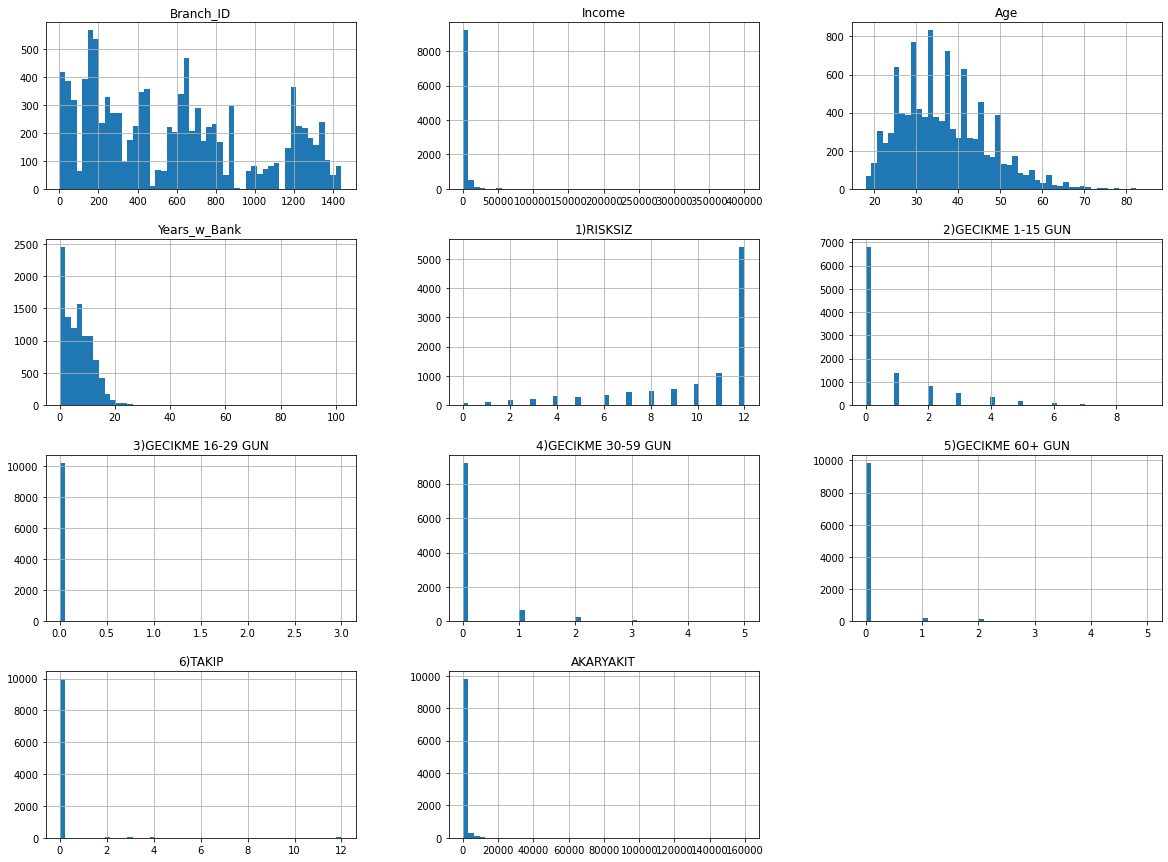

In [112]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
demo_df.iloc[:,0:19].hist(bins=50, figsize=(20,15))
plt.show()

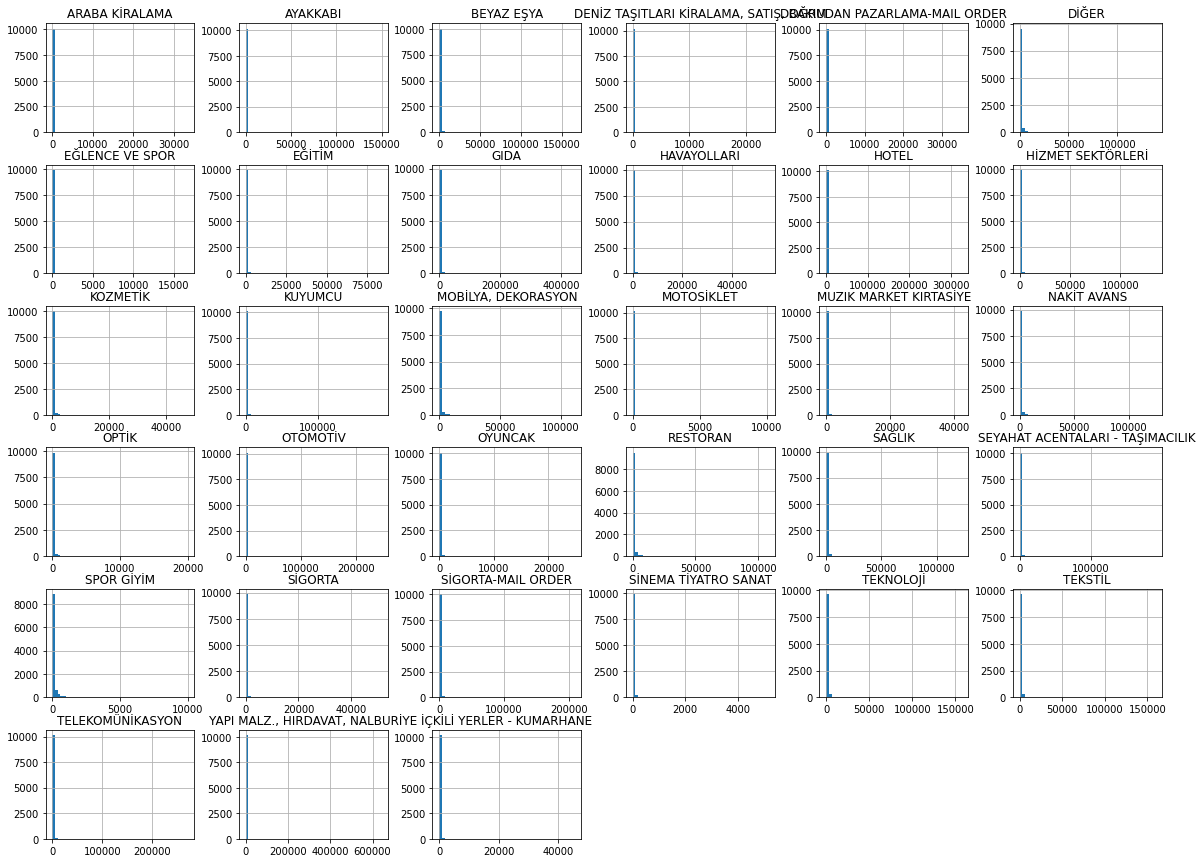

In [113]:
demo_df.iloc[:,20:].hist(bins=50, figsize=(20,15))
plt.show()

In [114]:
demo_df.columns.values

array(['Cust_Segment', 'Branch_ID', 'Gender', 'Marital_Status',
       'Education_Lv', 'Job_Status', 'Income', 'Age', 'Years_w_Bank',
       'Work_Region', 'Home_Region', 'Branch_Region', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUM

## Data Processing

In [115]:
#train/test split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(demo_df, test_size = 0.2, random_state = 16)

In [116]:
# separate labels from feature matrix
train_y = train_set['Marital_Status']
train_X = train_set.drop('Marital_Status', axis = 1)
# test_y = test_set['Marital_Status']
# test_X = test_set.drop('Marital_Status', axis = 1)

In [117]:
#pipeline

# locations, gender, marital status, education level, job status, penalties
# Additional processing with full data set: drop home region branch region nulls

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [118]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [119]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUMARHANE']
cat_attribs = ['Cust_Segment', 'Gender', 'Education_Lv', 'Job_Status', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs), 
], remainder = 'passthrough')

In [120]:
train_X_prepared = full_pipeline.fit_transform(train_X)

In [121]:
train_y_md = (train_y == 'EVLİ')
# test_y_md = (test_y == 'EVLİ')

## Dimensionality Reduction

In [122]:
#pca
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 92)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [123]:
d

39

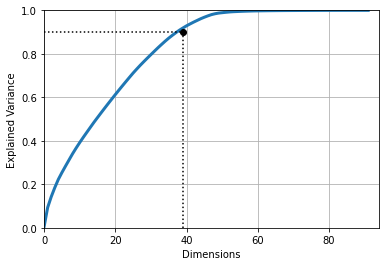

In [124]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 94, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")

plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

# try 8 dimensions

In [125]:
TruncSVD = TruncatedSVD(n_components=39)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

# Train Model

## Bagging Classifier

### Randomized Search

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier

param_distribs = {
        'base_estimator__max_depth': randint(low=1, high=10),
        'base_estimator__max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=300)
    }

dt_classif = DecisionTreeClassifier() 

bag_classif = BaggingClassifier(base_estimator = dt_classif)
rnd_search_cv = RandomizedSearchCV(bag_classif, param_distributions=param_distribs,
                                n_iter=20, cv=3, scoring='accuracy', random_state=16)
rnd_search_cv.fit(X_reduced, train_y_md)

RandomizedSearchCV(cv=3,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b9e70dbb0>,
                                        'base_estimator__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6ba804d790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b99e76460>},
                   random_state=16, scoring='accuracy')

In [146]:
rnd_search_cv.best_params_

{'base_estimator__max_depth': 9,
 'base_estimator__max_features': 5,
 'n_estimators': 227}

### Training

#### All Dimensions

In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=9, max_features=6), n_estimators=118,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(train_X_prepared, train_y_md)

bag_clf.oob_score_

0.75

In [136]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(bag_clf, X_reduced, train_y_md, cv = 3)

In [136]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_md, y_train_pred)

0.7578392944634983

In [137]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[1219, 1720],
       [ 257, 4968]])

In [131]:
# How to treat branch_id - should be discrete

# download docker container image with components needed
# set up conda environment, install rapids
# rapids.ai

#### Reduced Dimensions

In [147]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=9, max_features=6), n_estimators=118,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_reduced, train_y_md)

bag_clf.oob_score_

0.746202841744243

In [148]:
y_train_pred = cross_val_predict(bag_clf, X_reduced, train_y_md, cv = 3)

accuracy_score(train_y_md, y_train_pred)

0.7441205291523763

In [149]:
confusion_matrix(train_y_md, y_train_pred)

array([[1404, 1535],
       [ 554, 4671]])

## AdaBoost

### Random Search

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import AdaBoostClassifier

param_distribs = {
        'base_estimator__max_depth': randint(low=1, high=10),
        'base_estimator__max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=500),
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
    }

dt_classif = DecisionTreeClassifier() 

ada_classif = AdaBoostClassifier(base_estimator = dt_classif, algorithm="SAMME.R")
rnd_search = RandomizedSearchCV(ada_classif, param_distributions=param_distribs,
                                n_iter=20, cv=3, scoring='accuracy', random_state=16)
rnd_search.fit(X_reduced, train_y_md)

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b9fcd0a00>,
                                        'base_estimator__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6bd7f5e640>,
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6bd7ca61f0>},
                   random_state=16, scoring='accuracy')

In [94]:
rnd_search.best_params_

{'base_estimator__max_depth': 7,
 'base_estimator__max_features': 2,
 'learning_rate': 0.5,
 'n_estimators': 413}

### Training

In [95]:
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=7, max_features=2), n_estimators=413,
algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_reduced, train_y_md)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         max_features=2),
                   learning_rate=0.5, n_estimators=413)

In [96]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(ada_clf, X_reduced, train_y_md, cv = 3)

In [97]:
confusion_matrix(train_y_md, y_train_pred)

array([[ 587,  663],
       [ 260, 2040]])

In [98]:
accuracy_score(train_y_md, y_train_pred)

0.74

## Gradient Boost

### Random Search

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=1, high=10),
        'max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=500),
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
    }


gb_classif = GradientBoostingClassifier()
rd_search = RandomizedSearchCV(gb_classif, param_distributions=param_distribs,
                                n_iter=10, cv=3, scoring='accuracy', random_state=16)
rd_search.fit(train_X_prepared, train_y_md)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f830c662b20>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f835265d1c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f83688c18e0>},
                   random_state=16, scoring='accuracy')

In [101]:
rd_search.best_params_

{'learning_rate': 0.4, 'max_depth': 9, 'max_features': 3, 'n_estimators': 265}

### Training

In [171]:
gbrt = GradientBoostingClassifier(max_depth=9, max_features=3, n_estimators=265, learning_rate=0.4)
gbrt.fit(train_X_prepared, train_y_md)

GradientBoostingClassifier(learning_rate=0.4, max_depth=9, max_features=3,
                           n_estimators=265)

In [172]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gbrt, train_X_prepared, train_y_md, cv = 3)

In [173]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_md, y_train_pred)

0.7441205291523763

In [174]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[1404, 1535],
       [ 554, 4671]])

In [175]:
confusion_matrix(train_y_md, y_train_pred)

array([[1624, 1315],
       [ 633, 4592]])

## Neural Network

In [71]:
# import tensorflow as tf
# from tensorflow import keras

2022-05-09 16:01:25.004011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-09 16:01:25.004039: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [84]:
# input_ = keras.layers.Input(shape=train_X_prepared.shape[1:])
# hidden1 = keras.layers.Dense(25, activation="relu")(input_)
# hidden2 = keras.layers.Dense(25, activation="relu")(hidden1)
# hidden3 = keras.layers.Dense(25, activation="relu")(hidden2)
# output = keras.layers.Dense(1)(hidden3)
# model = keras.models.Model(inputs=[input_], outputs=[output])
# model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 94)]              0         
                                                                 
 dense_13 (Dense)            (None, 25)                2375      
                                                                 
 dense_14 (Dense)            (None, 25)                650       
                                                                 
 dense_15 (Dense)            (None, 25)                650       
                                                                 
 dense_16 (Dense)            (None, 1)                 26        
                                                                 
Total params: 3,701
Trainable params: 3,701
Non-trainable params: 0
_________________________________________________________________


In [85]:
# model.compile(loss="binary_crossentropy",
# metrics=["accuracy"])

In [86]:
# history = model.fit(X_train, y_train, epochs=30,
# validation_data=(X_val, y_val))

Epoch 1/30
192/192 [==============================] - 1s 4ms/step - loss: 0.8057 - accuracy: 0.6766 - val_loss: 0.7595 - val_accuracy: 0.7379
Epoch 2/30
192/192 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.7436 - val_loss: 0.7222 - val_accuracy: 0.7648
Epoch 3/30
192/192 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7586 - val_loss: 0.7019 - val_accuracy: 0.7741
Epoch 4/30
192/192 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7620 - val_loss: 0.6801 - val_accuracy: 0.7741
Epoch 5/30
192/192 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7674 - val_loss: 0.7814 - val_accuracy: 0.7555
Epoch 6/30
192/192 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7720 - val_loss: 0.7069 - val_accuracy: 0.7751
Epoch 7/30
192/192 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.7753 - val_loss: 0.7155 - val_accuracy: 0.7741
Epoch 